# Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps


# 1. Построение распределений 

Сгенерировать выборку с распределением Рэлэя ( https://ru.wikipedia.org/wiki/Распределение_Рэлея ) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib. 

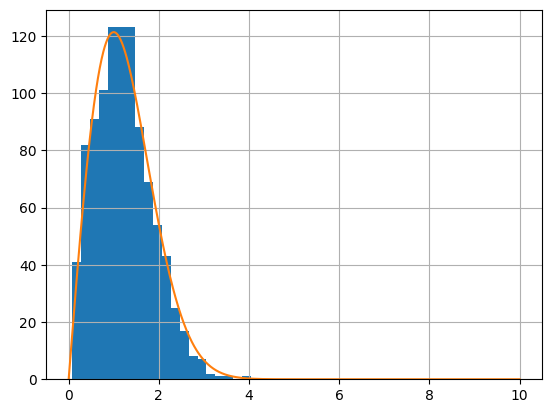

In [2]:
x = np.linspace(0, 10, 1000)
seq = np.random.rayleigh(1, 1000)
rayleigh = sps.rayleigh()
plt.hist(seq, 20)
plt.plot(x, rayleigh.pdf(x)*200)
plt.grid()
plt.show()


# 2. Построение графика на по функции 

Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график. 

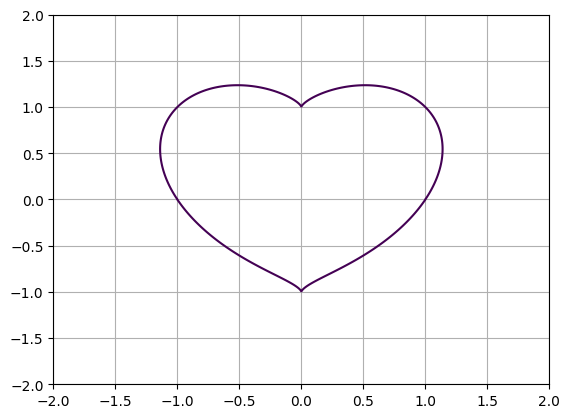

In [3]:
def funct(x, y):
    return (x**2+y**2-1)**3 - (x**2) * (y**3)


x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
Z = funct(X, Y)
plt.grid()
plt.contour(X, Y, Z, levels=[0])
plt.show()


# 3. Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию. 

## 3.1. Загрузка данных

Чтение данных их файла `dataset_home.txt`, преобразование строк и формирование массивов np.array.

In [4]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []
regionsMap = {
    "northwest": 0,
    "northeast": 1,
    "southwest": 2,
    "southeast": 3
}

with open("dataset_home.txt", "r") as f:
    for line in f:
        items = line.split(",")
        age.append(int(items[0]))
        sex.append(1 if items[1] == "male" else 0)
        bmi.append(float(items[2]))
        children.append(int(items[3]))
        smoker.append(1 if items[4] == "yes" else 0)
        region.append(regionsMap[items[5]])
        charges.append(float(items[6]))

age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charges = np.array(charges)


## 3.2. Сбор информации о данных

Перед анализом ознакомимся параметрами имеющихся данных

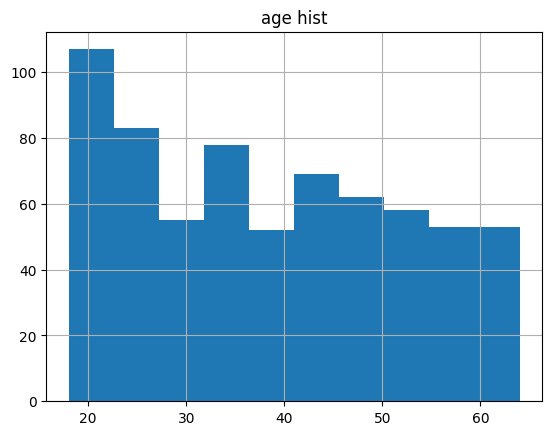

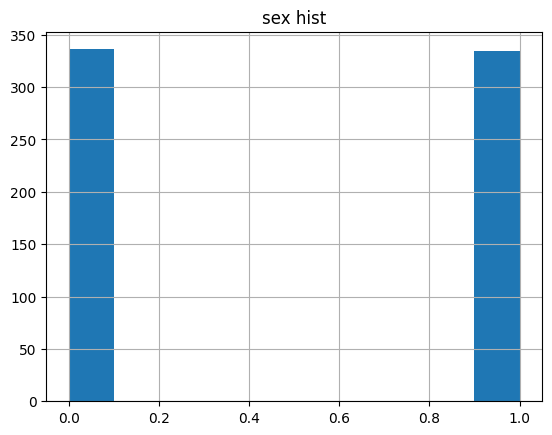

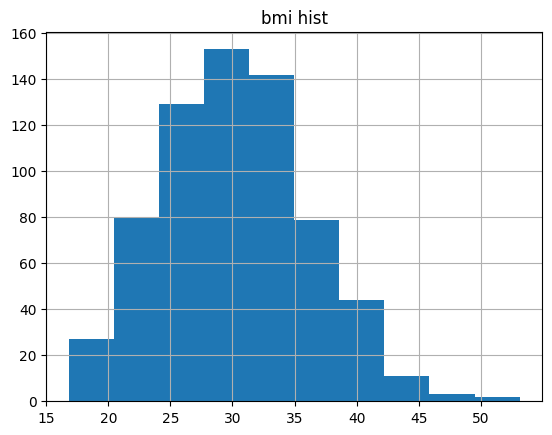

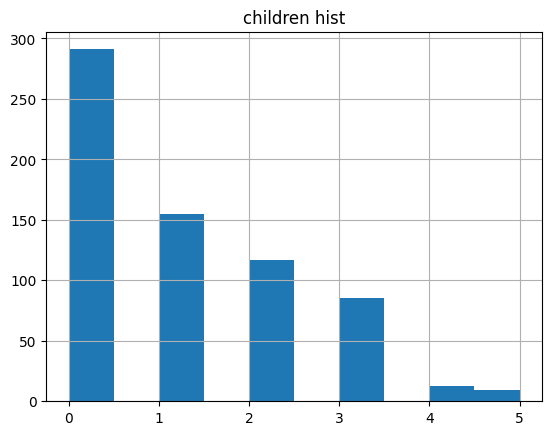

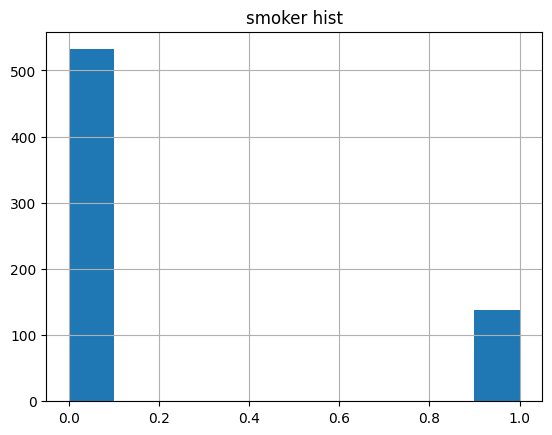

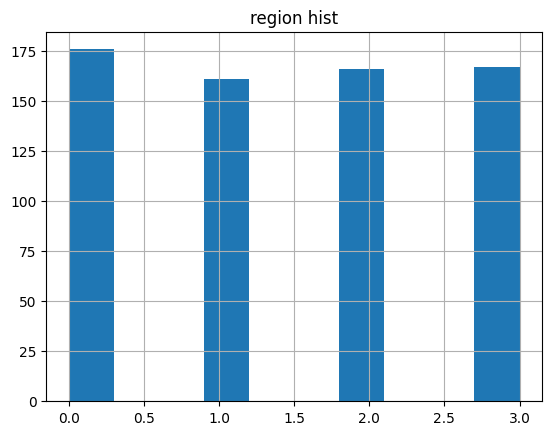

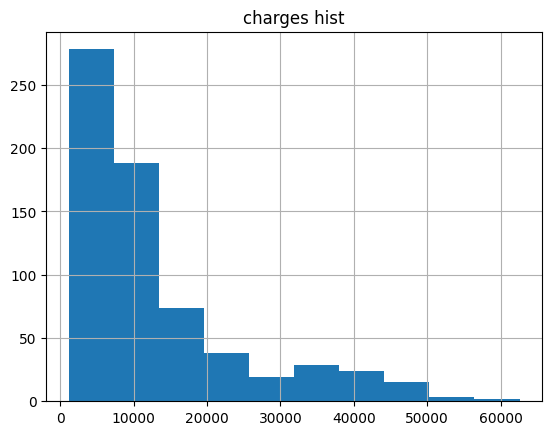

Mean age: 38.37761194029851
Mean bmi: 30.212865671641794
Mean children: 1.1059701492537313
Mean charges: 12899.874326014924


In [5]:
plt.grid()
plt.hist(age)
plt.title("age hist")
plt.show()


plt.grid()
plt.hist(sex)
plt.title("sex hist")
plt.show()

plt.grid()
plt.hist(bmi)
plt.title("bmi hist")
plt.show()

plt.grid()
plt.hist(children)
plt.title("children hist")
plt.show()

plt.grid()
plt.hist(smoker)
plt.title("smoker hist")
plt.show()

plt.grid()
plt.hist(region)
plt.title("region hist")
plt.show()

plt.grid()
plt.hist(charges)
plt.title("charges hist")
plt.show()

print("Mean age:",age.mean())
print("Mean bmi:",bmi.mean())
print("Mean children:",children.mean())
print("Mean charges:",charges.mean())


Распределения по регионам и полу - равномерные. Распределение по BMI - номальное. 

Большинство людей в выборке:
* с возрастом <40 лет
* не курят
* имеют детей
* пользуются стразовкой с минимальной стоимостью 

Средний возраст: 38.4 года

Средний BMI: 30.2

Среднее количество детей: 1.1

Средняя стомость страховки: 12 900

## 3.3. Поиск зависимостей

Определеим гуппы по цене страховки. Начнем с курильщиков.

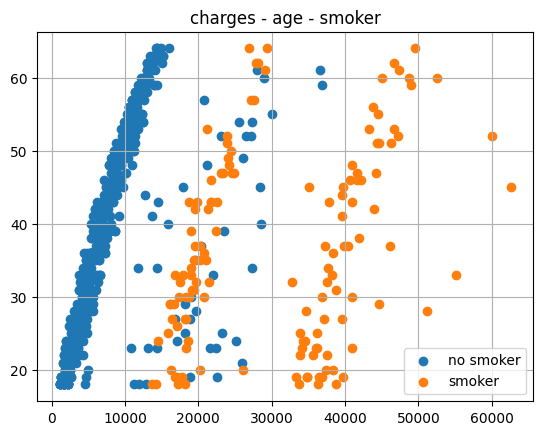

In [6]:

plt.scatter(charges[smoker == 0], age[smoker == 0], label="no smoker")
plt.scatter(charges[smoker == 1], age[smoker == 1], label="smoker")
plt.legend()
plt.grid()
plt.title("charges - age - smoker")
plt.show()

На графике видно 3 группы стоимости страховки. Условно их можно разделить на "дешевую", "среднюю" и "дорогую".

У курильщиков стоимость страховки варьируется от "средней" до "дорогой". Причем "дорогая" страховка встречается только у курильщиков.

Так же из графика видно, что с возрастом стоимость страховки увечивается. 

Попробуем уточнить группу людей с "дорогой" страховкой.

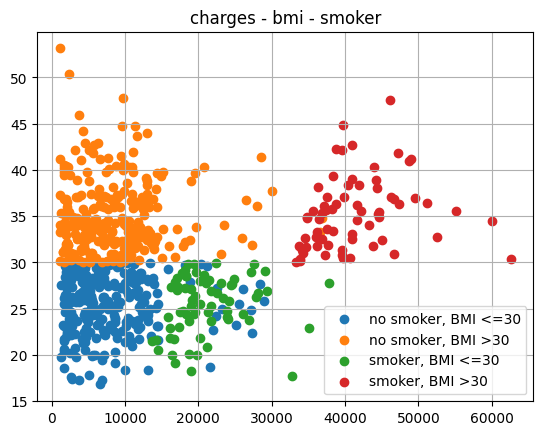

In [7]:
plt.scatter(charges[(smoker==0) & (bmi<=30)], bmi[(smoker==0) & (bmi<=30)], label="no smoker, BMI <=30")
plt.scatter(charges[(smoker==0) & (bmi>30)], bmi[(smoker==0) & (bmi>30)], label="no smoker, BMI >30")
plt.scatter(charges[(smoker==1) & (bmi<=30)], bmi[(smoker==1) & (bmi<=30)], label="smoker, BMI <=30")
plt.scatter(charges[(smoker==1) & (bmi>30)], bmi[(smoker==1) & (bmi>30)], label="smoker, BMI >30")
plt.title("charges - bmi - smoker")
plt.legend()
plt.grid()
plt.show()

На графике `charges - bmi`  видно отделившуюся группу с charges > 30000 и bmi > 30. При добавлении условия группировки по курильщиками становится видно, что покупатели дорогой страховки - курилльщики с BMI выше среднего.

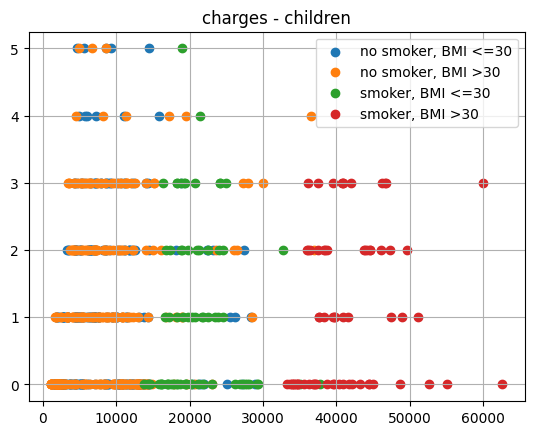

In [8]:
plt.scatter(charges[(smoker==0) & (bmi<=30)], children[(smoker==0) & (bmi<=30)], label="no smoker, BMI <=30")
plt.scatter(charges[(smoker==0) & (bmi>30)], children[(smoker==0) & (bmi>30)], label="no smoker, BMI >30")
plt.scatter(charges[(smoker==1) & (bmi<=30)], children[(smoker==1) & (bmi<=30)], label="smoker, BMI <=30")
plt.scatter(charges[(smoker==1) & (bmi>30)], children[(smoker==1) & (bmi>30)], label="smoker, BMI >30")
plt.title("charges - children")
plt.legend()
plt.grid()
plt.show()

Удивительно, но с увеличением количества детей стоимость страховки не растет. Колчество детей на стоимость страховки не влияет.

## 3.4. Заключение

Наибольшая стомость страховки - у курящих людей с bmi > 30

Группа людей со средней стоимостью страховки черзвычайно размыта. Туда входят как курящие, так и не курящие люди с различным BMI (как малым, так и большим). Т.е. в этой группе находятся с риском для здоровья, но каким - определить по настоящим данным не представляется возможным.

Группа с наименьшей стоимостью страховки самая многочисленная.

Прочие параметры: "количество детей", "регион проживания" или "пол" - не влияют на стоимость страховки.